<a href="https://colab.research.google.com/github/fagnermacedo/DataCience_DIO/blob/main/Aula_04_An%C3%A1lise_Explorat%C3%B3ria0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# Upload do arquivo via código
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
df = pd.read_excel("AdventureWorks.xlsx")

In [4]:
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
df["Valor Venda"].sum()

5984606.1426

In [9]:
#Criando uma coluna de custo total
df["Custo_total"] = df["Custo Unitário"] * df["Quantidade"]

In [12]:
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo_total
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [15]:
df["Luvro"] = df["Valor Venda"] - df["Custo_total"]

In [16]:
#Qual o custo toal?
round(df["Custo_total"].sum(),2)


2486783.05

In [18]:
df["Lucro"] = df["Valor Venda"] - df["Custo_total"]

In [21]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [20]:
#Configurando os números flutuantes
pd.options.display.float_format = '{:20,.2f}'.format

In [23]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [25]:
#Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

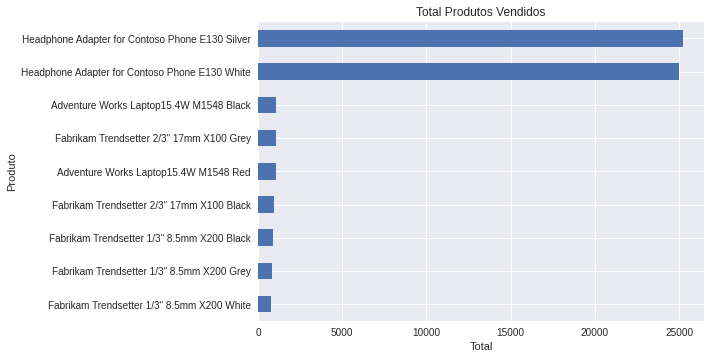

In [26]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

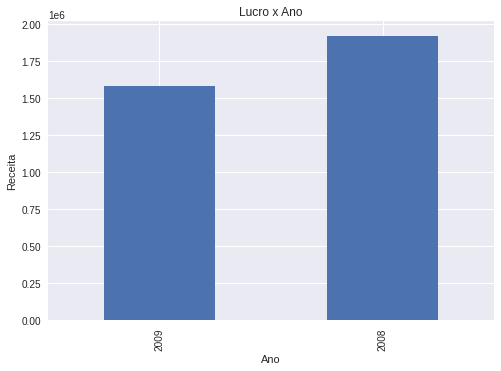

In [28]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().sort_values(ascending=True).plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");


In [30]:
#Verificando somente as venda do ano  de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo_total,Luvro,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52","2,456.52"
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52","2,456.52"
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52","2,456.52"
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52","2,456.52"
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52","2,456.52"


Text(0, 0.5, 'Lucro')

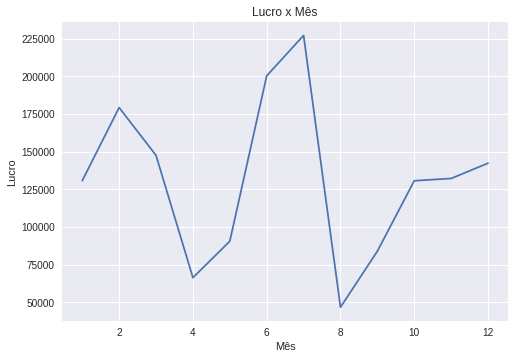

In [31]:
#Gráfico de linha. Passa apenas o " .plot "
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

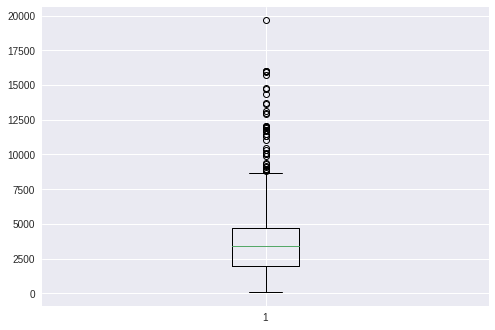

In [32]:
plt.boxplot(df["Lucro"]);

In [34]:
df.to_csv("df_vendas_novo.csv", index=False)